In [4]:
import pandas as pd
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

from hypex.dataset import Dataset, ExperimentData, InfoRole, TreatmentRole, TargetRole
from hypex.comparators import TTest, KSTest, GroupSizes, GroupDifference
from hypex.utils import SpaceEnum
from hypex.splitters import AASplitter
from hypex.analyzers import OneAAStatAnalyzer
from hypex.analyzers.aa2 import AAScoreAnalyzer
from hypex.experiments.aa2 import AATest

In [5]:
data = Dataset(
    roles={
        "user_id": InfoRole(int),
        "treat": TreatmentRole(int),
        "pre_spends": TargetRole(),
        "post_spends": TargetRole(),
        "gender": TargetRole()
    }, data="data.csv",
)
# data

In [6]:
aa = AATest(range(10))
res = aa.execute(ExperimentData(data))
res

In [7]:
res = AAScoreAnalyzer().execute(res)
res.analysis_tables

AttributeError: value

<Axes: >

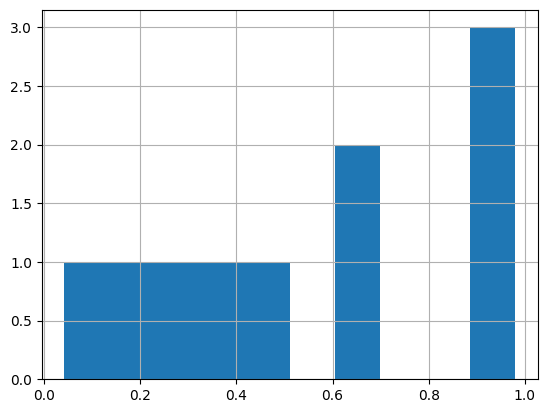

In [ ]:
res.analysis_tables['AATest┴┴']['post_spends┴KSTest┴p-value┴test'].data.iloc[:, 0].hist()

In [ ]:
res.analysis_tables['AATest┴┴'].iloc[0, 0]

AttributeError: 'str' object has no attribute 'columns'